**Introduction**

A client has installed solar panels at her home for electricity generation. She seeks to purchase ans install a battery pack to store the excess generated electricity, and also supplement when there is reduced sunlight irradiation. This model will help her analyze the potential savings in her electricity costs from purchasing a battery. The data is represented in an hourly basis.

**Objectives**

- To determine the potential savings in electricity costs from purchasing a battery.
- To calculate NPV and IRR of the investment.

**Overview**

In this exercise I shall seek to do the following:

*   Load the dataset
*   Understand the dataset
*   Prepare the dataset (Example: cleaning the dataset, checking for outliers)
*   Make and evaluate models
*   Perform predictions
*   Come up with relevant findings


**Data Understanding**

The dataset was provided for the exercise in excel format.

Loading the relevant libraries

In [177]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [178]:
#Importing the dataset
solar_data = pd.read_excel('/content/Junior Data Analyst _ Data (1).xlsx', index_col = 1)
solar_data.head()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
Date/hour start,,,
2020-01-01 00:00:00,0,0.0,1.509849
2020-01-01 01:00:00,1,0.0,1.411859
2020-01-01 02:00:00,2,0.0,1.023898
2020-01-01 03:00:00,3,0.0,0.642000
2020-01-01 04:00:00,4,0.0,0.960000


Performing basic discovery on the dataset

In [180]:
def shape (dataframe):

  print('Dataframe shape:', dataframe.shape)
  print('\n')
  print('Datatypes and missing values', dataframe.info())
  print('\n')
  description = dataframe.describe(include='all')
  print('Dataframe Description')

  return description

shape (solar_data)


Dataframe shape: (8760, 3)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   int64  
 1   Solar electricity generation (kWh)  8760 non-null   float64
 2   Electricity usage (kWh)             8760 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 273.8 KB
Datatypes and missing values None


Dataframe Description


,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


In [181]:
solar_data.columns

Index(['Hour', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

The dataset contains 4 columns and 8760 rows

There are no missing values in the data

The datatypes are float, datetime and integer

**Exploratory Data Analysis**

(i)

***Displaying a graph showing the average solar electricity generation and average electricity usage for each hour in a day and checking for outiers.***

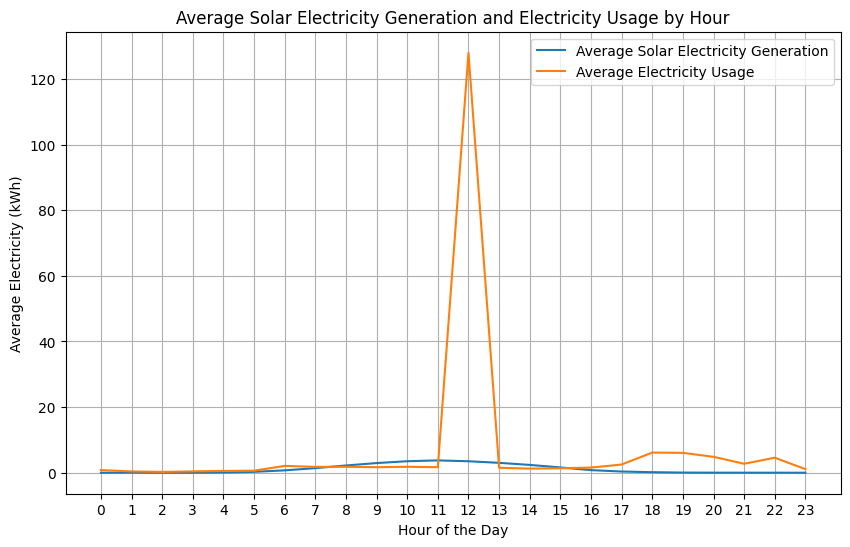

In [182]:
# Extracting the hour from the timestamp
solar_data['Hour'] = solar_data.index.hour

# Grouping the data by hour and calculating the average
hourly_avg = solar_data.groupby('Hour').mean()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg['Solar electricity generation (kWh)'], label='Average Solar Electricity Generation')
plt.plot(hourly_avg.index, hourly_avg['Electricity usage (kWh)'], label='Average Electricity Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Electricity (kWh)')
plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()



There is presence of outliers for the average values between 1100 hrs and 1300hrs.

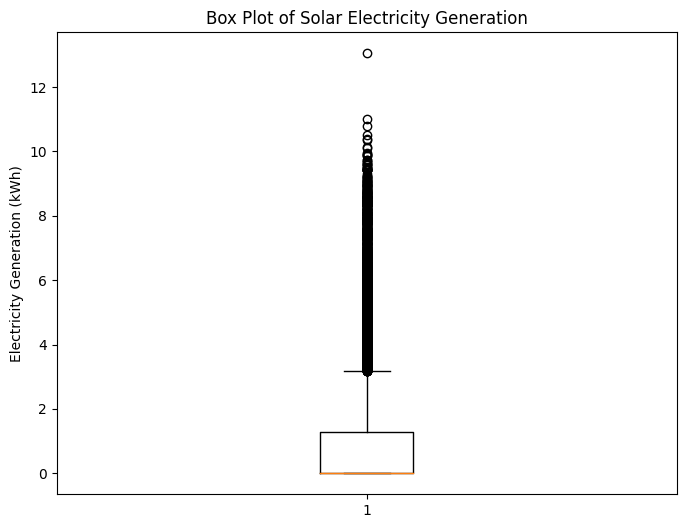

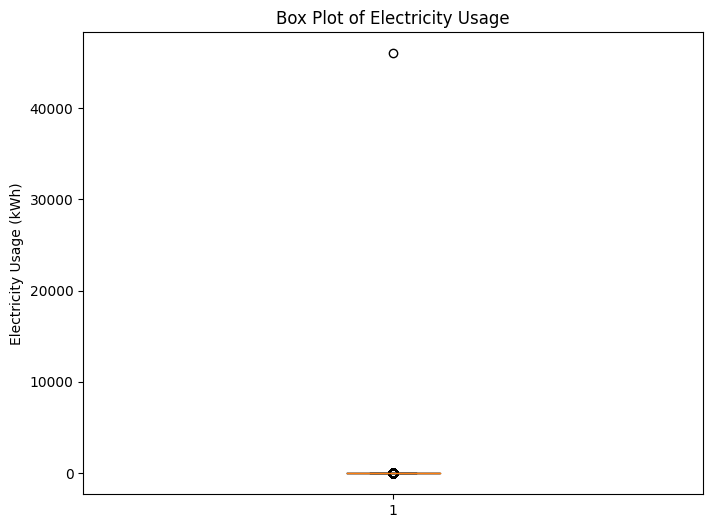

In [183]:
# Creating a box plot for solar electricity generation
plt.figure(figsize=(8, 6))
plt.boxplot(solar_data['Solar electricity generation (kWh)'])
plt.title('Box Plot of Solar Electricity Generation')
plt.ylabel('Electricity Generation (kWh)')
plt.show()

# Creating a box plot for electricity usage
plt.figure(figsize=(8, 6))
plt.boxplot(solar_data['Electricity usage (kWh)'])
plt.title('Box Plot of Electricity Usage')
plt.ylabel('Electricity Usage (kWh)')
plt.show()

***Investigating the outliers***

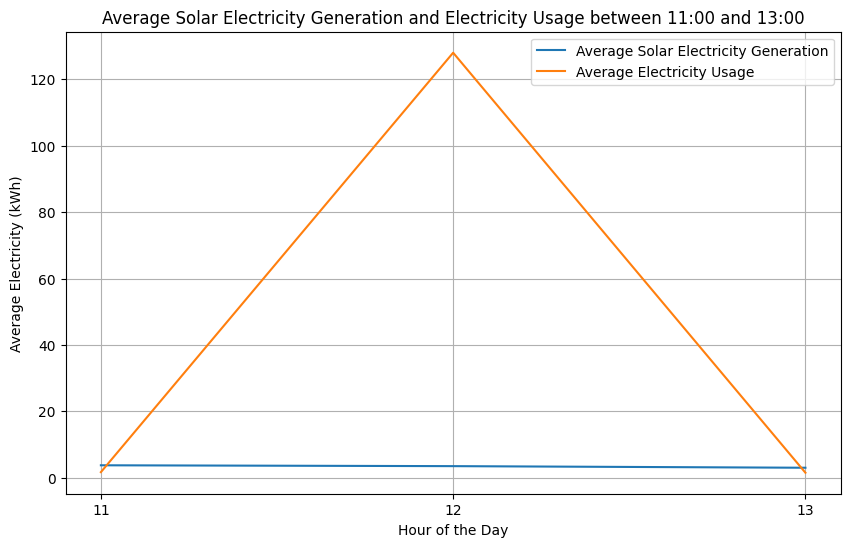

In [184]:
# Filtering the DataFrame to include only data points between 1100hrs and 13:00hrs
solar_data_filtered = solar_data[(solar_data['Hour'] >= 11) & (solar_data['Hour'] <= 13)]

# Grouping the filtered data by hour and calculating the average
hourly_avg_filtered = solar_data_filtered.groupby('Hour').mean()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_filtered.index, hourly_avg_filtered['Solar electricity generation (kWh)'], label='Average Solar Electricity Generation')
plt.plot(hourly_avg_filtered.index, hourly_avg_filtered['Electricity usage (kWh)'], label='Average Electricity Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Electricity (kWh)')
plt.title('Average Solar Electricity Generation and Electricity Usage between 11:00 and 13:00')
# Displaying only hours between 11 and 13 on x-axis
plt.xticks(range(11, 14))
plt.legend()
plt.grid(True)
plt.show()

In [185]:
# Displaying the average values numerically
print("Average solar electricity generation and electricity usage between 1100 and 1300hrs:")
print(hourly_avg_filtered)

Average Solar Electricity Generation and Electricity Usage between 11:00 and 13:00:
      Solar electricity generation (kWh)  Electricity usage (kWh)
Hour                                                             
11                              3.751915                 1.685425
12                              3.495879               128.000444
13                              3.012649                 1.512797


***There appears to be an outlier at 1200 hours***

In [186]:
#Conducting further investigations
print(solar_data_filtered)

                     Hour  Solar electricity generation (kWh)  \
Date/hour start                                                 
2020-01-01 11:00:00    11                               0.000   
2020-01-01 12:00:00    12                               0.651   
2020-01-01 13:00:00    13                               0.363   
2020-01-02 11:00:00    11                               0.498   
2020-01-02 12:00:00    12                               0.399   
...                   ...                                 ...   
2020-12-30 12:00:00    12                               3.957   
2020-12-30 13:00:00    13                               1.641   
2020-12-31 11:00:00    11                               0.525   
2020-12-31 12:00:00    12                               0.912   
2020-12-31 13:00:00    13                               2.535   

                     Electricity usage (kWh)  
Date/hour start                               
2020-01-01 11:00:00                    0.000  
2020-01-01 12

***Given the outlier is present at the 1200 hr mark. I sought to find the numericall equivalent of the value using InterQuartile range***

In [188]:
# Calculate the first quartile (Q1)
Q1 = solar_data_filtered['Electricity usage (kWh)'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = solar_data_filtered['Electricity usage (kWh)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = solar_data_filtered[(solar_data_filtered['Electricity usage (kWh)'] < lower_bound) | (solar_data_filtered['Electricity usage (kWh)'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
                     Hour  Solar electricity generation (kWh)  \
Date/hour start                                                 
2020-01-02 13:00:00    13                               0.504   
2020-01-09 11:00:00    11                               0.252   
2020-01-12 12:00:00    12                               5.214   
2020-01-14 11:00:00    11                               0.387   
2020-01-14 12:00:00    12                               0.372   
...                   ...                                 ...   
2020-12-24 13:00:00    13                               0.009   
2020-12-25 11:00:00    11                               0.138   
2020-12-25 12:00:00    12                               0.018   
2020-12-28 13:00:00    13                               0.006   
2020-12-29 11:00:00    11                               0.375   

                     Electricity usage (kWh)  
Date/hour start                               
2020-01-02 13:00:00                   22.500  
202

***I have identified the outlier and proceeding to use drop the value***

In [190]:
#specifying the entry to remove
index_label_to_remove = pd.to_datetime('2020-01-12 12:00:00')

# Removing the entry from the DataFrame
solar_data_new = solar_data.drop(index_label_to_remove)

# Verifying that the entry is removed
print("Original DataFrame shape:", solar_data.shape)
print("Cleaned DataFrame shape:", solar_data_new.shape)

Original DataFrame shape: (8760, 3)
Cleaned DataFrame shape: (8759, 3)


***We have identified our outliers and we proceed to use the mean in place for the values***

**(ii) Solving for the amount of electricity to be bought from the electricity provider**

In [192]:
# Calculating the amount of electricity needed to be bought for each hour
solar_data_new['Electricity bought (kWh)'] = solar_data_new['Electricity usage (kWh)'] - solar_data_new['Solar electricity generation (kWh)']
solar_data_new['Electricity bought (kWh)'] = solar_data_new['Electricity bought (kWh)'].clip(lower=0)  # Set negative values to zero

# Print the DataFrame with the calculated column
print(solar_data_new)

                     Hour  Solar electricity generation (kWh)  \
Date/hour start                                                 
2020-01-01 00:00:00     0                               0.000   
2020-01-01 01:00:00     1                               0.000   
2020-01-01 02:00:00     2                               0.000   
2020-01-01 03:00:00     3                               0.000   
2020-01-01 04:00:00     4                               0.000   
...                   ...                                 ...   
2020-12-31 19:00:00    19                               0.012   
2020-12-31 20:00:00    20                               0.003   
2020-12-31 21:00:00    21                               0.000   
2020-12-31 22:00:00    22                               0.015   
2020-12-31 23:00:00    23                               0.000   

                     Electricity usage (kWh)  Electricity bought (kWh)  
Date/hour start                                                         
2020-01-

**(iii) Solving for the excess solar electricity generated over electricity used**

In [193]:
# Calculating the excess solar electricity generated over electricity measured
solar_data_new['Excess solar generated (kWh)'] = solar_data_new['Solar electricity generation (kWh)'] - solar_data_new['Electricity usage (kWh)']
solar_data_new['Excess solar generated (kWh)'] = solar_data_new['Excess solar generated (kWh)'].clip(lower=0)  # Set negative values to zero

# Printing the DataFrame with the calculated column
print(solar_data_new)

                     Hour  Solar electricity generation (kWh)  \
Date/hour start                                                 
2020-01-01 00:00:00     0                               0.000   
2020-01-01 01:00:00     1                               0.000   
2020-01-01 02:00:00     2                               0.000   
2020-01-01 03:00:00     3                               0.000   
2020-01-01 04:00:00     4                               0.000   
...                   ...                                 ...   
2020-12-31 19:00:00    19                               0.012   
2020-12-31 20:00:00    20                               0.003   
2020-12-31 21:00:00    21                               0.000   
2020-12-31 22:00:00    22                               0.015   
2020-12-31 23:00:00    23                               0.000   

                     Electricity usage (kWh)  Electricity bought (kWh)  \
Date/hour start                                                          
2020-0

**(iv) Modeling the cumulative battery charge level (in kWh) for each hour over 2020, assuming a battery had been installed**

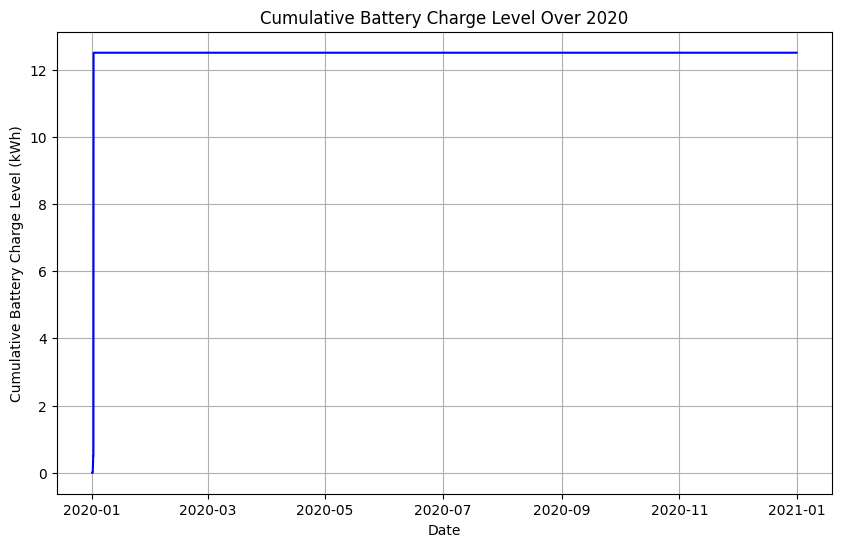

In [194]:
# Initializing variables
battery_capacity = 12.5  # kWh
battery_charge_level = 0  # Initial charge level
cumulative_charge_levels = []

# Iterating through each hour in 2020
for index, row in solar_data_new.iterrows():
    # Calculating the excess solar electricity generated over electricity used
    excess_solar_electricity = row['Excess solar generated (kWh)']

    # Determining how much excess electricity can be stored in the battery
    excess_to_store = min(excess_solar_electricity, battery_capacity - battery_charge_level)

    # Updating the battery charge level
    battery_charge_level += excess_to_store

    # Ensuring that the battery charge level does not exceed the maximum capacity
    battery_charge_level = min(battery_charge_level, battery_capacity)

    # Appending the updated battery charge level to the list
    cumulative_charge_levels.append(battery_charge_level)

# Plotting the cumulative battery charge level over 2020
plt.figure(figsize=(10, 6))
plt.plot(solar_data_new.index, cumulative_charge_levels, color='blue')
plt.xlabel('Date')
plt.ylabel('Cumulative Battery Charge Level (kWh)')
plt.title('Cumulative Battery Charge Level Over 2020')
plt.grid(True)
plt.show()


***From the graph we observe that the cumulative charge in the battery will be constant after the month of January 2020, maintaining a peak charge voltage***

**(v) Amount of electricity that would have been bought from the electricity provider assuming a battery had been installed**

In [196]:
# Iterating through each hour in 2020
for index, row in solar_data_new.iterrows():

    # Calculating the electricity usage
    electricity_usage = row['Electricity usage (kWh)']

    # Subtracting the excess electricity that can be stored in the battery from the excess solar electricity
    effective_excess_electricity = excess_solar_electricity - excess_to_store

    # Determining if electricity needs to be bought from the electricity provider
    if effective_excess_electricity < electricity_usage:
        # Calculating the amount of electricity that needs to be bought from the electricity provider
        electricity_to_buy = electricity_usage - effective_excess_electricity
    else:
        electricity_to_buy = 0  # No electricity needs to be bought

    # Appending the amount of electricity bought to the list and ensuring non-negative values
    electricity_bought.append(max(electricity_to_buy, 0))

# Converting the list to a DataFrame with appropriate index
electricity_bought_df = pd.DataFrame(electricity_bought, index=solar_data_new.index, columns=['Electricity bought (kWh)'])

# Print the DataFrame with the calculated column
print(electricity_bought_df)


                     Electricity bought (kWh)
Date/hour start                              
2020-01-01 00:00:00                  1.509849
2020-01-01 01:00:00                  1.411859
2020-01-01 02:00:00                  1.023898
2020-01-01 03:00:00                  0.642000
2020-01-01 04:00:00                  0.960000
...                                       ...
2020-12-31 19:00:00                  4.395600
2020-12-31 20:00:00                  4.560600
2020-12-31 21:00:00                  2.022000
2020-12-31 22:00:00                  1.668000
2020-12-31 23:00:00                  0.805919

[8759 rows x 1 columns]


***I have populated a new column with the Electricity bought figures***

**(vi) Savings in dollars from installling a battery compared to using the existing solar panels alone**

In [197]:
# Calculating the amount of electricity bought from the electricity provider for each hour in 2020 using only solar panels
electricity_bought_solar_panels = solar_data_new['Electricity usage (kWh)'] - solar_data_new['Solar electricity generation (kWh)']
electricity_bought_solar_panels = electricity_bought_solar_panels.clip(lower=0)  # Set negative values to zero

# Calculating the amount of electricity bought from the electricity provider for each hour in 2020 assuming a battery had been installed
electricity_bought_with_battery = electricity_bought_df['Electricity bought (kWh)']

# Calculating the difference in electricity bought between the two scenarios
electricity_bought_difference = electricity_bought_solar_panels - electricity_bought_with_battery

# Calculating the total saving over 2020 (in dollars)
saving_2020 = electricity_bought_difference * 0.17  # Electricity price $0.17 per kWh

# Printing the total saving over 2020
total_saving_2020 = saving_2020.sum()
print("Total saving over 2020 (in dollars):", total_saving_2020)


Total saving over 2020 (in dollars): -417.095504628


Total saving over 2020 (in dollars): -417.095504628

**(vii) Tabulating the data and priducing a chart to illustrate, on a monthly basis for the calendar year and measured in kWh.**

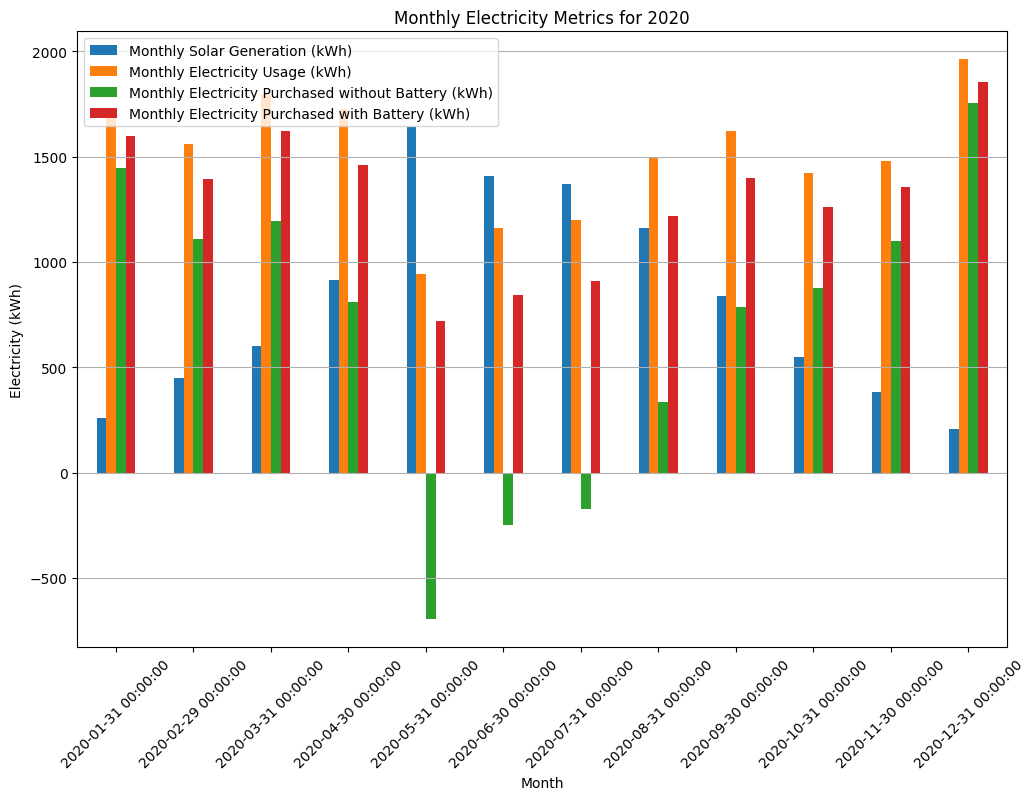

In [198]:
# Grouping the data by month and sum the values
monthly_data = solar_data_new.resample('M').sum()

# Creating a DataFrame from the grouped data
monthly_df = pd.DataFrame({
    'Monthly Solar Generation (kWh)': monthly_data['Solar electricity generation (kWh)'],
    'Monthly Electricity Usage (kWh)': monthly_data['Electricity usage (kWh)'],
    'Monthly Electricity Purchased without Battery (kWh)': monthly_data['Electricity usage (kWh)'] - monthly_data['Solar electricity generation (kWh)'],
    'Monthly Electricity Purchased with Battery (kWh)': monthly_data['Electricity bought (kWh)']
})

# Plotting the data
monthly_df.plot(kind='bar', figsize=(12, 8))
plt.title('Monthly Electricity Metrics for 2020')
plt.xlabel('Month')
plt.ylabel('Electricity (kWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.show()


**(viii) Projecting annual savings for 20 years given the two scenarios:
*   Electricity prices increase as expected by the government, 4% p.a.
*   Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.**


In [199]:
# Initializing the variables
annual_savings_scenario1 = []
annual_savings_scenario2 = []

# Electricity price on 1 January 2022
electricity_price_2022 = 0.17

# Electricity price inflation rates
annual_inflation_rate_scenario1 = 0.04
annual_inflation_rate_scenario2_start = 0.04
additional_inflation_rate_scenario2 = 0.0025

# Calculating annual savings for each year from 2022 to 2041 for both scenarios
for year in range(2022, 2042):
    # Calculating electricity price for the current year for both scenarios
    electricity_price_scenario1 = electricity_price_2022 * ((1 + annual_inflation_rate_scenario1) ** (year - 2022))
    electricity_price_scenario2 = electricity_price_2022 * ((1 + annual_inflation_rate_scenario2_start + additional_inflation_rate_scenario2 * (year - 2022)) ** (year - 2022))

    # Calculating the difference in electricity bought between using the battery and not using the battery for each scenario
    difference_scenario1 = electricity_bought_df['Electricity bought (kWh)'].sum() * (electricity_price_2022 - electricity_price_scenario1)
    difference_scenario2 = electricity_bought_df['Electricity bought (kWh)'].sum() * (electricity_price_2022 - electricity_price_scenario2)

    # Appending the annual savings to the lists
    annual_savings_scenario1.append(difference_scenario1)
    annual_savings_scenario2.append(difference_scenario2)

# Printing the annual savings for each scenario for each year from 2022 to 2041
for year, (saving_scenario1, saving_scenario2) in enumerate(zip(annual_savings_scenario1, annual_savings_scenario2), start=2022):
    print(f"Year {year}: Scenario 1 - ${saving_scenario1:.2f}, Scenario 2 - ${saving_scenario2:.2f}")


Year 2022: Scenario 1 - $0.00, Scenario 2 - $0.00
Year 2023: Scenario 1 - $-122.94, Scenario 2 - $-130.62
Year 2024: Scenario 1 - $-250.79, Scenario 2 - $-282.83
Year 2025: Scenario 1 - $-383.76, Scenario 2 - $-459.09
Year 2026: Scenario 1 - $-522.04, Scenario 2 - $-662.33
Year 2027: Scenario 1 - $-665.86, Scenario 2 - $-896.04
Year 2028: Scenario 1 - $-815.43, Scenario 2 - $-1164.33
Year 2029: Scenario 1 - $-970.98, Scenario 2 - $-1472.09
Year 2030: Scenario 1 - $-1132.76, Scenario 2 - $-1825.13
Year 2031: Scenario 1 - $-1301.00, Scenario 2 - $-2230.30
Year 2032: Scenario 1 - $-1475.98, Scenario 2 - $-2695.78
Year 2033: Scenario 1 - $-1657.95, Scenario 2 - $-3231.31
Year 2034: Scenario 1 - $-1847.21, Scenario 2 - $-3848.47
Year 2035: Scenario 1 - $-2044.03, Scenario 2 - $-4561.14
Year 2036: Scenario 1 - $-2248.73, Scenario 2 - $-5385.94
Year 2037: Scenario 1 - $-2461.61, Scenario 2 - $-6342.83
Year 2038: Scenario 1 - $-2683.01, Scenario 2 - $-7455.86
Year 2039: Scenario 1 - $-2913.27,

**(viii) Calculating the NPV of the future annual savings:
*   Electricity prices increase as expected by the government, 4% p.a.
*   Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.**


In [200]:
# Discount rate
discount_rate = 0.06  # 6% per annum

# Calculating NPV for scenario 1
npv_scenario1 = sum([saving / ((1 + discount_rate) ** (year - 2022)) for year, saving in enumerate(annual_savings_scenario1, start=2022)])

# Calculating NPV for scenario 2
npv_scenario2 = sum([saving / ((1 + discount_rate) ** (year - 2022)) for year, saving in enumerate(annual_savings_scenario2, start=2022)])

# Print NPV for both scenarios
print("Net Present Value (NPV) for Scenario 1:", round(npv_scenario1, 2))
print("Net Present Value (NPV) for Scenario 2:", round(npv_scenario2, 2))


Net Present Value (NPV) for Scenario 1: -14236.39
Net Present Value (NPV) for Scenario 2: -32276.04
